# Visualize News Accounts

#### Project 2 TikTok News Exposure 
##### Group 2

In [1]:
import os, json, csv
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\shhwa\AppData\Local\Temp\ipykernel_29920\3698202559.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dir_path = 'C:/Users/shhwa/OneDrive/CS 315/tiktok-news/following_data' # hardcoded for security purposes
files = os.listdir(dir_path)
files

['user_data_CJ_following.json',
 'user_data_JR_following.json',
 'user_data_ML_following.json',
 'user_data_rb_following.json',
 'user_data_SH_following.json',
 'user_data_SL_following.json']

In [3]:
def getFollowing(file):
    with open(dir_path + '/' + file, 'r') as user_following:
        data = json.load(user_following)
    return data


In [4]:
df = pd.DataFrame()
with open(dir_path + '/' + 'user_data_CJ_following.json', 'r') as user_following:
    data = json.load(user_following)
    df['1'] = data
df
data

['lifecoachshawn',
 'gibby4real',
 'bnb1980',
 'mukakoooooo',
 'solar.ejs',
 'eltablers',
 'mukako06',
 '.junonia',
 'alicebichanga',
 'g_hennessy',
 'r.ohini',
 'throwinazz',
 'imbatman0.123',
 'willywonkatiktok',
 'weirdchocolategirl05',
 'lilnasx',
 'dreamwastakenwastaken',
 'thewellesleynews']

In [5]:
news_accounts = 'C:/Users/shhwa/OneDrive/CS 315/tiktok-news/news_accounts.csv'
with open(news_accounts, encoding='utf8') as fin:
        dr = csv.DictReader(fin)
        metrics = [row['Username'] for row in dr]
metrics

['nytimes',
 'washingtonpost',
 'cnn',
 'pbsnews',
 'abcnews',
 'msnbc',
 'cbsnews',
 'briantylercohen',
 'cbseveningnews',
 'abcworldnews',
 'nbcnews',
 'yahoonews',
 '7newsq',
 '',
 'skynews',
 'bbc',
 'forbes',
 'usatoday',
 'gbnews',
 'varietymagazine',
 'sophiasmithgaler',
 'maxfostercnn',
 'nytopinion',
 '60minutes',
 'cbsmornings',
 'cbssundaymorning',
 'vicenews',
 'abcnewslive',
 'gma',
 'newsweek',
 'underthedesknews',
 'theconversation',
 'nowthisimpact ',
 'dailymail',
 'davebondy',
 'aljazeeraenglish',
 'vicenewsdocs',
 'c4news',
 'itvnews',
 'niickjackson',
 'abc7la',
 'reuters',
 'npr',
 'nowthis',
 'brutamerica',
 'thetelegraph',
 'vox',
 'buzzfeednews',
 'taylorlorenz',
 'wallstreetjournal',
 'latimes',
 'natgeo',
 'vicderbyshire',
 'pinknews',
 'eveningstandard',
 'cleoabram',
 'sandragathmann',
 'tldrnews',
 'morningbrew',
 'semafor',
 'thepocketreport',
 'theeconomist',
 'thegarbagequeen',
 'nbcnightlynews',
 'benjaminzamoratven',
 'thenewsmovement',
 'elliecolts',


In [6]:
'americanews24h' in metrics

True

In [7]:
def getNewsProportions(files):
    newsProportions = pd.DataFrame(columns=['news accounts', 'non-news accounts'])
    index = []
    #newsProportions = pd.DataFrame(columns=['user', 'total following', 'news accounts', 'non-news accounts'])
    for user in files:
        following = getFollowing(user)
        total = len(following)
        news = 0
        non_news = 0
        index.append(user[10:12].upper())
        for account in following:
            if account in metrics:
                news += 1
            else:
                non_news += 1
        metadata = [news, non_news]
        #metadata = [user[10:12].upper(), total, news, non_news]
        newsProportions.loc[len(newsProportions.index)] = metadata
    newsProportions.index = index
    return newsProportions

In [8]:
newsProportions = getNewsProportions(files)
newsProportions

,news accounts,non-news accounts
CJ,1,17
JR,0,98
ML,0,65
RB,0,226
SH,2,418
SL,0,3


C:\Users\shhwa\AppData\Local\Temp\ipykernel_29920\3135898305.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stackplot.text(i, cumulative_values.iloc[i, j] - newsProportions[val][i] / 2,
C:\Users\shhwa\AppData\Local\Temp\ipykernel_29920\3135898305.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(newsProportions[val][i]), ha='center', va='center',)


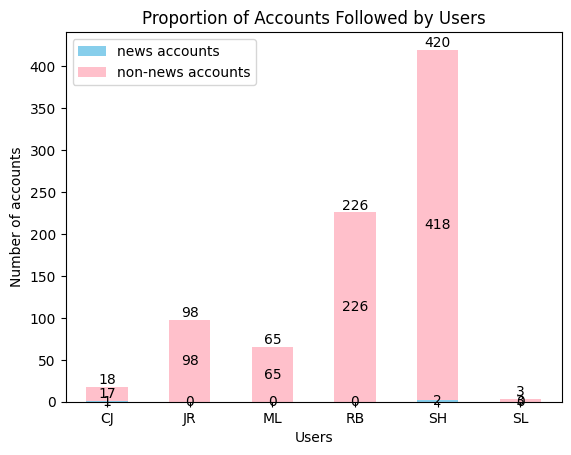

In [9]:
stackplot = newsProportions.plot(kind='bar', stacked=True, color=["skyblue", "pink"])
stackplot.set_title("Proportion of Accounts Followed by Users")
stackplot.set_ylabel("Number of accounts")
stackplot.set_xlabel("Users")
stackplot.set_xticklabels(stackplot.get_xticklabels(), rotation=0)
stackplot.bar_label(stackplot.containers[1])

cumulative_values = newsProportions.cumsum(axis=1)
for i in range(len(newsProportions)):
    for j, val in enumerate(newsProportions.columns):
        stackplot.text(i, cumulative_values.iloc[i, j] - newsProportions[val][i] / 2,
                       str(newsProportions[val][i]), ha='center', va='center',)